# Social_Network_Ads
Dataset on Social media ads describing users, whether users have purchased a product by clicking on the advertisements shown to them.
#### Reference: https://www.kaggle.com/akram24/social-network-ads

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
dataset[0:9]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0


In [2]:
# Splitting the dataset into the Training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting the classifier to the Training set: SVM

In [3]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

## Making the Confusion Matrix

In [4]:
from sklearn.metrics import confusion_matrix 
def Classification(clf, X, y):
    X_set, y_set = X, y
    y_hat = clf.predict(X_set)
    y_hat = np.reshape(y_hat, -1)
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    cm = confusion_matrix(y_set, y_hat)    
    TN = cm[0, 0]
    FN = cm[1, 0]
    TP = cm[1, 1]
    FP = cm[0, 1]    
    accuracy = (TP + TN)/(TN + FN + TP + FP)
    PPV = TP/(TP + FP) # Positive Predictive Value, Precision 
    TPR = TP/(TP + FN) # Sensitivitive, Recall    
    TNR = TN/(TN + FP) # Specificitive
    NPV = TN/(TN + FP) # Negative Predictive Value    
    F1_score = 2/(1/PPV + 1/TPR)
    summary = {'Accuracy': accuracy, 
               'Positive_Predictive_Value': PPV, 
               'Negative_Predictive_Value': NPV,            
               'Sensitivitive': TPR, 
               'Specificitive': TNR,            
               'F1_score': F1_score, 
               'CM': cm}
    return summary

### Training Set

In [5]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 0.9133333333333333,
 'Positive_Predictive_Value': 0.8512396694214877,
 'Negative_Predictive_Value': 0.9047619047619048,
 'Sensitivitive': 0.9279279279279279,
 'Specificitive': 0.9047619047619048,
 'F1_score': 0.8879310344827587,
 'CM': array([[171,  18],
        [  8, 103]], dtype=int64)}

### Test Set

In [6]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.93,
 'Positive_Predictive_Value': 0.8787878787878788,
 'Negative_Predictive_Value': 0.9411764705882353,
 'Sensitivitive': 0.90625,
 'Specificitive': 0.9411764705882353,
 'F1_score': 0.8923076923076924,
 'CM': array([[64,  4],
        [ 3, 29]], dtype=int64)}

## Visualising the results

In [7]:
from matplotlib.colors import ListedColormap
def result_plot(clf, X, y, title = 'Classifier'):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    contour_pred = clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    plt.contourf(X1, X2, contour_pred, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)): 
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                    color = ListedColormap(('red', 'green'))(i), 
                    edgecolor = 'black', 
                    label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

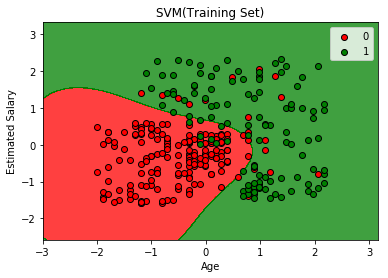

In [8]:
result_plot(clf = classifier, X = X_train, y = y_train, title = 'SVM(Training Set)')

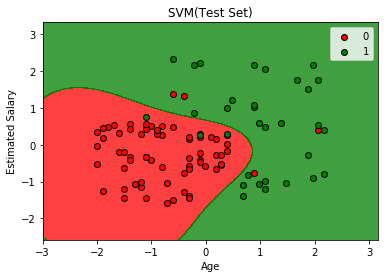

In [9]:
result_plot(clf = classifier, X = X_test, y = y_test, title = 'SVM(Test Set)')